# So, You wanna be an Airbnb host?
- Team: 418 I'm teapot

In this project, we are trying to investigate the Airbnb pricing strategies.
We evaluate the listed price from two perspectives: 
1. Pre-transaction: the intrinsic value of host's property, location and amenities； host's description about his/her place; 
2. Post-transaction: customer reviews.

In [15]:
# @hidden_cell
import numpy as np
import pandas as pd
import string
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("ggplot")
from collections import Counter
from nltk.tokenize import TweetTokenizer
#from nltk.stem import WordNetLemmatizer
#from nltk.corpus import stopwords

listings = pd.read_csv('/Users/sarawu/Dropbox/Projects and Case Studies/Airbnb datadive/Seatle data/listings.csv',encoding = "ISO-8859-1")

## Part 1. pre-transaction: what happens before customers decide to book your room?

In [16]:
# feature extracted
df = listings[["id","price","description","neighbourhood","accommodates","bathrooms", "bedrooms", "beds", "bed_type", "property_type","amenities", "host_about", "host_response_rate"]]
df = df.dropna(how='any')

# tokenizer
tknzr = TweetTokenizer()
# list of punctuation to remove
punctuation = list(string.punctuation)

### 1.1 Finding a nearby location

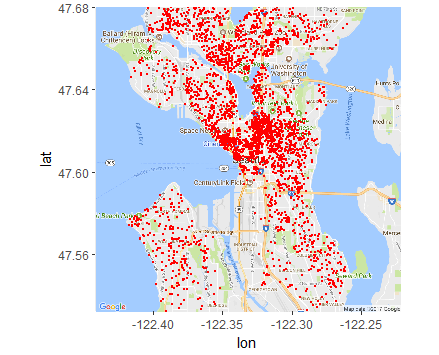

In [10]:
from IPython.display import Image

Image(filename = "seatle map.png")

Surrounded by lakes and acres of lush green forest, the city of Seattle offers a perfect mix of urban attractions and outdoor recreation. There are Airbnb host acorss the whole city of Seattle, which makes it a big convenient for tourists. Most of the available house locate in the north part, the beautiful scenery and  distinctive culture of Seattle attract people from all over the world.

### 1.2 Setting up a target price range within an area

In [43]:
# cleaning data
# convert price string into float number
price = df["price"]
clean_price = []
for p in price:
    temp = p[1:].replace(",","")
    clean_price.append(float(temp))
df["price"] = clean_price

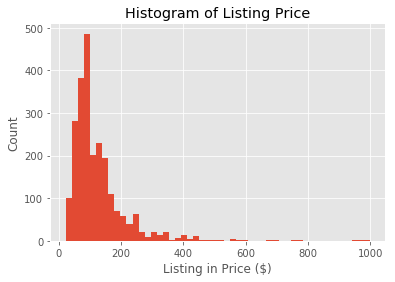

In [44]:
# plot of price range
df["price"].hist(bins=50)
plt.xlabel("Listing in Price ($)")
plt.ylabel("Count")
plt.title("Histogram of Listing Price")

The price range displays a right-skewed distribution, with most price between ~$150.

### 1.3 How many bedrooms/bathrooms customers want to book?

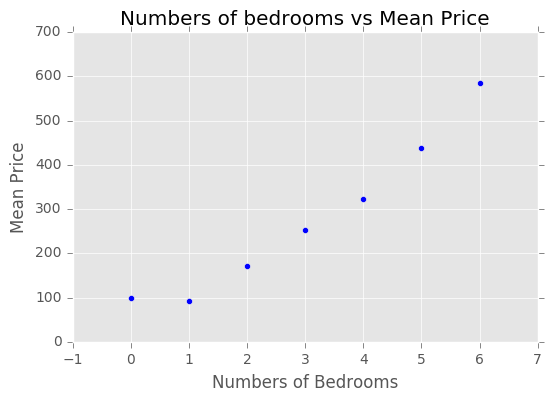

In [14]:
bedrooms_cluster = df.groupby(["bedrooms"]).mean()
# plot: price vs accommodates
plt.scatter(bedrooms_cluster.index,bedrooms_cluster["price"])
plt.xlabel("Numbers of Bedrooms")
plt.ylabel("Mean Price")
plt.title("Numbers of bedrooms vs Mean Price")

COMMENT: only one house in our sample provides with seven bedrooms. Most of the house have 2 to 4 bedrooms in total. And we find that, the house with the same number of bedrooms, the price can differ a lot. So we plot the mean price given the same bedrooms and hope to find some pattern in it.
Ignore the only house with seven bedrooms.  Now, look at the plot of mean price given the same bedrooms, we can find there is a obvious incresing trend. The more bedrooms, the higher expected price of a house. 

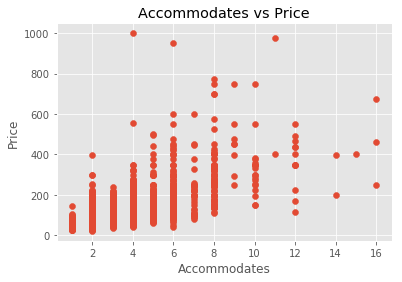

In [46]:
# plot: price vs accommodates
plt.scatter(df["accommodates"],df["price"])
plt.xlabel("Accommodates")
plt.ylabel("Price")
plt.title("Accommodates vs Price")

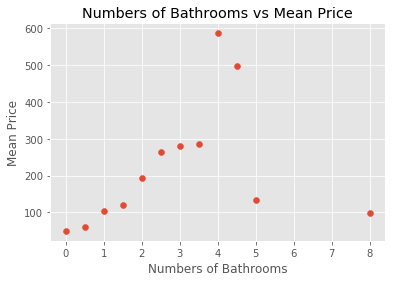

In [47]:
bathrooms_cluster = df.groupby(["bathrooms"]).mean()
# plot: price vs accommodates
plt.scatter(bathrooms_cluster.index,bathrooms_cluster["price"])
plt.xlabel("Numbers of Bathrooms")
plt.ylabel("Mean Price")
plt.title("Numbers of Bathrooms vs Mean Price")

COMMENT: in this case, when the number of bathroom is less than 4 in the house, there is a rough linear relationship with the mean price.

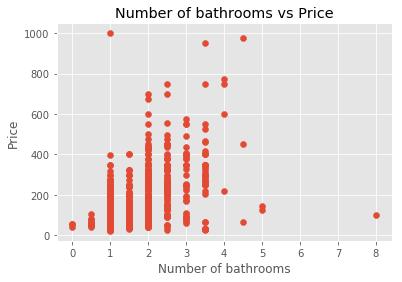

In [45]:
# plot: price vs bathrooms
plt.scatter(df["bathrooms"],df["price"])
plt.xlabel("Number of bathrooms")
plt.ylabel("Price")
plt.title("Number of bathrooms vs Price")

COMMENT: similar to the plot of number of bedrooms versus price. Most of the house have less than 4 bathrooms in total. And also, the house with the same number of bathrooms, the price can differ a lot.

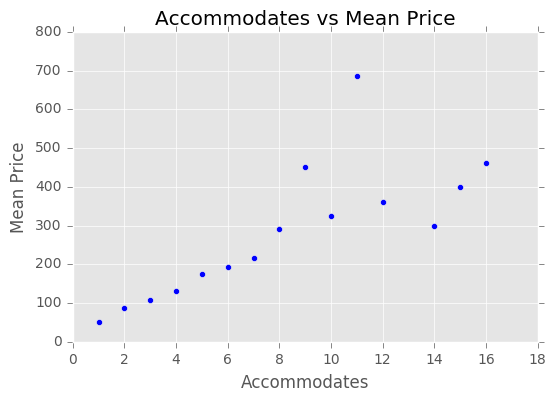

In [20]:
accommodates_cluster = df.groupby(["accommodates"]).mean()
# plot: price vs accommodates
plt.scatter(accommodates_cluster.index,accommodates_cluster["price"])
plt.xlabel("Accommodates")
plt.ylabel("Mean Price")
plt.title("Accommodates vs Mean Price")

### 1.4 Read the discription
After picking the location and the target price range, customers will firstly take a look at the discription to get an overview of the listed place.

In [7]:
description_count = []
# counting the number of words in the description
for row in df["description"]:
    row = tknzr.tokenize(row)
    # remove punctuation
    filter_row = [word for word in row if word not in punctuation]
    description_count.append(len(filter_row))

# adding new column into the data frame
df["description_length"]=  description_count

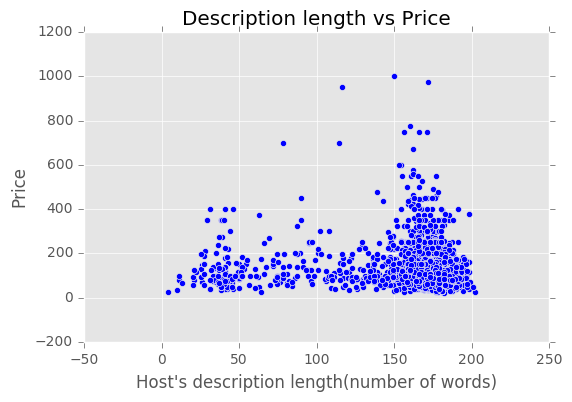

In [9]:
# plot: price vs description length
plt.scatter(df["description_length"],df["price"])
plt.xlabel("Host's description length(number of words)")
plt.ylabel("Price")
plt.title("Description length vs Price")

From this graph, it's understood that most hosts will write around 150~200 words about their place. If you want to set a relatively higher price for your place, you better write a good intro about your place!
Overall, there is not a strong relationship between the number of words you put for the description and the listed price.

### 1.5 Looking at the amenities prvided

In [9]:
amenities_count = []
# counting the number of words in amenities
for row in df["amenities"]:
    row = row.split(",")
    amenities_count.append(len(row))

# adding new column into the data frame
df["amenities_length"]=  amenities_count

In [6]:
# tv_internet = 0 if no tv nor internet
# tv_internet = 1 only tv
# tv_internet = 2 only internet
# tv_internet = 3 both included
tv_internet = []

for row in df["amenities"]:
    row = row.lower()
    row = tknzr.tokenize(row)
    filter_row = [word for word in row if word not in punctuation]

    if "tv" in filter_row:
        if "internet" in filter_row:
            tv_internet.append(3)
        else:
            tv_internet.append(1)
    elif "internet" in filter_row:
        tv_internet.append(2)
    else:
        tv_internet.append(0)
        
# adding new column into the data frame
df["tv_internet"]=  tv_internet

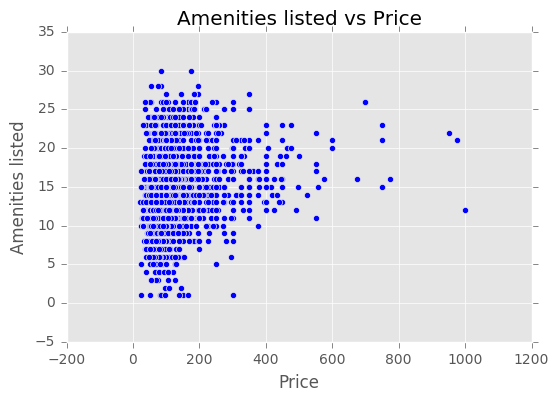

In [11]:
# plot: price vs amenities
plt.scatter(df["price"],df["amenities_length"])
plt.ylabel("Amenities listed")
plt.xlabel("Price")
plt.title("Amenities listed vs Price")

Providing more ameniteis doesn't mean you may charge a higher price! 
Ameniteis listed and price displays a normal relationship. You have to, of course, at least provide some essentials.
No one is willing to live in a room without wifi!!

#### Amenities: TV/Internet is important!
we chose to investigate the relationship of price and 2 specific amenities: Internet and TV (what people usually consider the most for short term trip). We can see that the price varies more when we have both Internet and TV in the listing house.

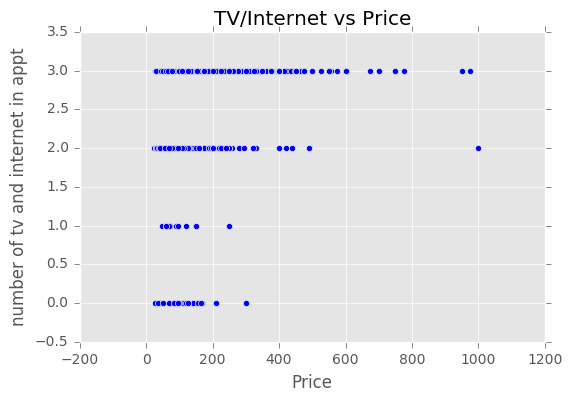

In [12]:
# plot: price vs TV/Internet
plt.scatter(df["price"],df["tv_internet"])
plt.ylabel("number of tv and internet in appt")
plt.xlabel("Price")
plt.title("TV/Internet vs Price")

### 1.6 Host Description: Say something about yourself!
- Customers will like to know who is the one offering the place, does she/he seem to be a nice person?
- Hmm, who knows, maybe customers pick your place just because you share the same interest!

In [8]:
host_about_count = []
# counting the number of words in host_about
for row in df["host_about"]:
    row = str(row)
    if row == "nan":
        host_about_count.append(0)
    else:
        row = str(row)
        row = tknzr.tokenize(row)
        # remove punctuation
        filter_row = [word for word in row if word not in punctuation]
        host_about_count.append(len(filter_row))

# adding new column into the data frame
df["host_about_length"]=  host_about_count

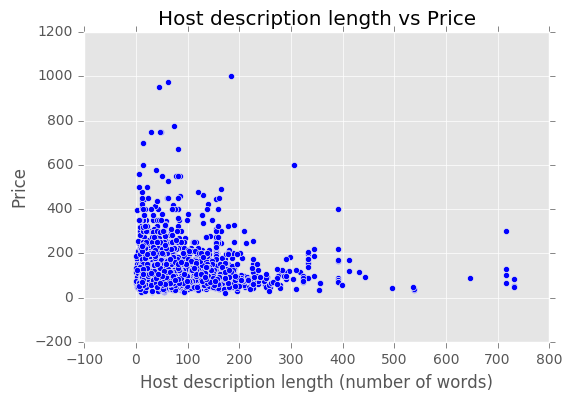

In [10]:
# plot: price vs host_about length
plt.scatter(df["host_about_length"],df["price"])
plt.xlabel("Host_about description length (number of words)")
plt.ylabel("Price")
plt.title("Host_about description length vs Price")

### 1.7 Hmm.... So customers are ready to book. How responsive should the host be?

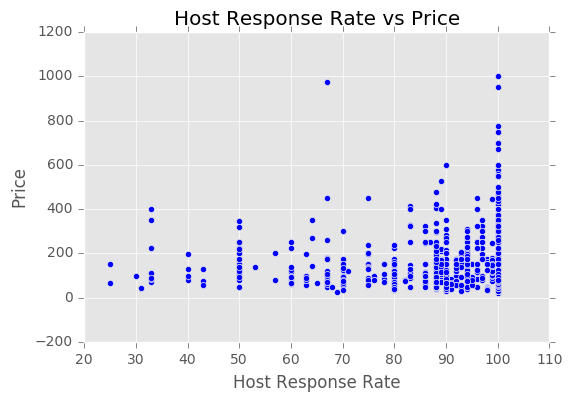

In [22]:
#strip('%')
rate = df["host_response_rate"]
new_rate = []
for row in rate:
    row = str(row).strip('%')
    new_rate.append(float(row))
df["host_response_rate"] = new_rate

# plot: price vs host reponse rate
plt.scatter(df["host_response_rate"],df["price"])
plt.xlabel("Host Response Rate")
plt.ylabel("Price")
plt.title("Host Response Rate vs Price")

The hosts who set a relatively higher price are more likely to response faster! However, most hosts are very reponsive (it can also be explained that the hosts who response more frequent tend to rent their place out at a higher frequency so that we have more observations for those).

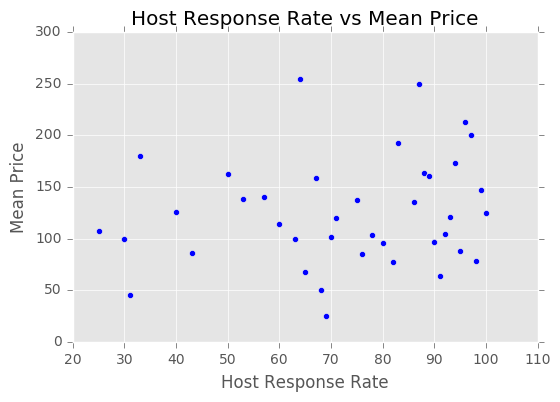

In [24]:
rate_cluster = df.groupby(["host_response_rate"]).mean()
# plot: price vs host response rate
plt.scatter(rate_cluster.index,rate_cluster["price"])
plt.xlabel("Host Response Rate")
plt.ylabel("Mean Price")
plt.title("Host Response Rate vs Mean Price")

Overall, There is not a strong relationship between response rate and listed price.

### 1.8 Requirements of hosts on customers?
- Do you have strict cancellation policy?
- Do you require customer phone/profile validation?

In [19]:
listing = pd.read_csv('/Users/sarawu/Dropbox/Projects and Case Studies/Airbnb datadive/Seatle data/listings.csv',encoding = "ISO-8859-1")
listing=listing[['id','price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','cancellation_policy','require_guest_phone_verification','require_guest_profile_picture','number_of_reviews']]
listing = listing.dropna()
listing.head()
import re
listing = listing[listing.price != 0]
# extracting prices from the table
price = listing['price']
cleanprice= []
#covnert price to float
for p in price:
    p = re.sub('[^0-9.]+','',p)
    cleanprice.append(float(p))
# put cleaned price into the column
listing['price'] = cleanprice

listing = listing[listing.price >= 0]
f = {'count','mean','median'}
guest_require = listing.groupby(['require_guest_phone_verification','require_guest_profile_picture']).price.agg(f)
guest_require.sort_values('mean', ascending = False)

,,mean,median,count
require_guest_phone_verification,require_guest_profile_picture,,,
t,t,147.174377,129.0,281
f,f,125.261973,100.0,2798
t,f,118.712121,100.0,66
f,t,88.615385,93.0,13


Most host does not requie phone and verification from customers.
However, those who require two fold verification tend tends to charge a relatively higher price!
It can be due to the fact that those hosts have better places and they care about the identity of potential customers! 

In [20]:
convert_nums = {"require_guest_phone_verification": {"t": 1, "f": 0},
                "require_guest_profile_picture": {"t": 1, "f": 0},
                "cancellation_policy":{"strict":2, "moderate":1,"flexible":0}}
listing.replace(convert_nums, inplace = True)

In [21]:
guest_req = []
guest_req = listing.cancellation_policy  + listing.require_guest_phone_verification + listing.require_guest_profile_picture
listing['guest_req'] = guest_req
lg = listing.groupby('guest_req').price.agg(f)
lg

,mean,median,count
guest_req,,,
0,104.965241,88.0,748
1,114.649326,99.0,1038
2,147.686803,120.0,1076
3,109.483871,99.0,93
4,168.536946,149.0,203


Putting the requirement hosts have on the guests together in a scale. Higher scale means most strict requirement. Those who impose more requirements on customers have ask more for their places.

## Part 2. post-transaction: what do they say about your place? How do they comment you as a host?

In [22]:
import seaborn as sns

reviews = pd.read_csv('/Users/sarawu/Dropbox/Projects and Case Studies/Airbnb datadive/Seatle data/reviews.csv',encoding = "ISO-8859-1")

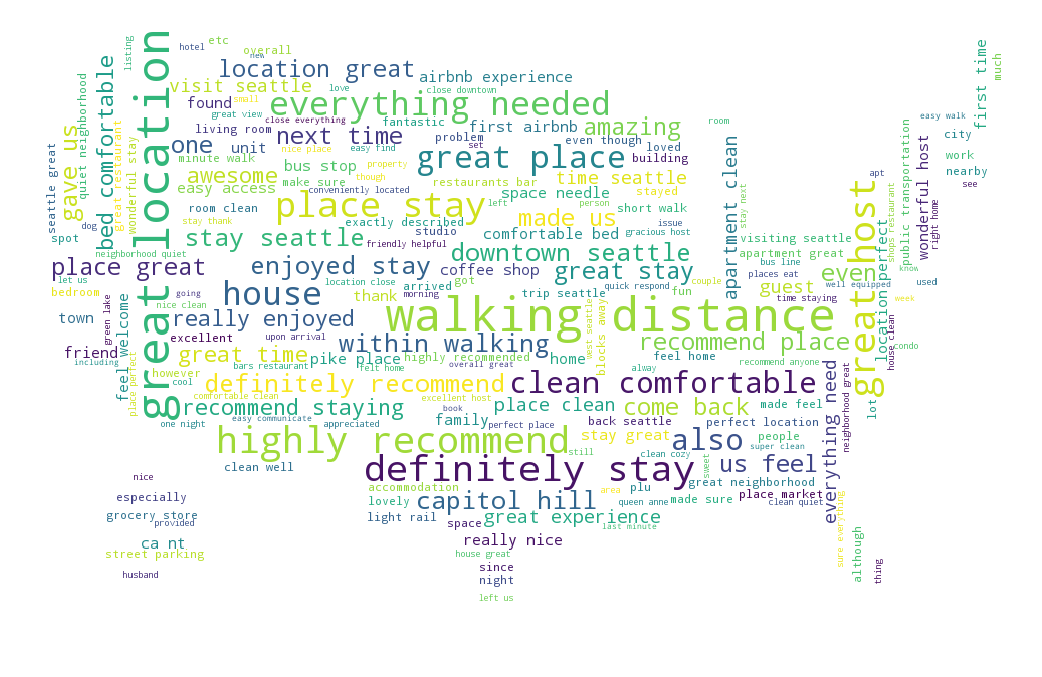

In [33]:
from IPython.display import Image

Image(filename = "wordcloud.png")

For the efficiency of using rating indexes in our final regression model, we analyse the relationships of rating indexes inspecting different aspects of the renting experience.

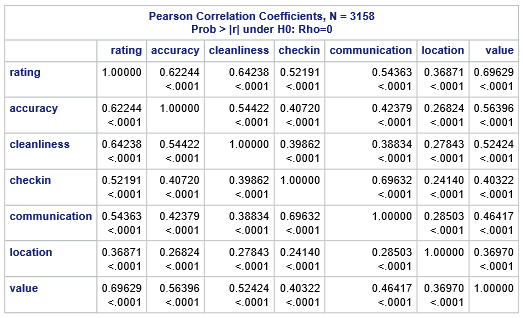

In [36]:
Image(filename = "image/1.PNG")

Through Pearson Correlation Coefficients, we find that there is a quite large correlation between different rating indexes, indicating a potential multilinearity in the regression model. We use factor analysis to further determine the necessity for dimension reduction and principal component analysis to combine all the variables.

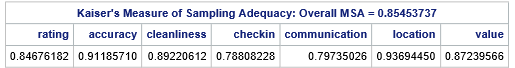

In [37]:
Image(filename = "image/2.PNG")


The KMS Adequacy analysis indicates a strong correlation among all the rating indexes with all indexes being over 0.75(>0.5 is appropriate for using factor analysis).

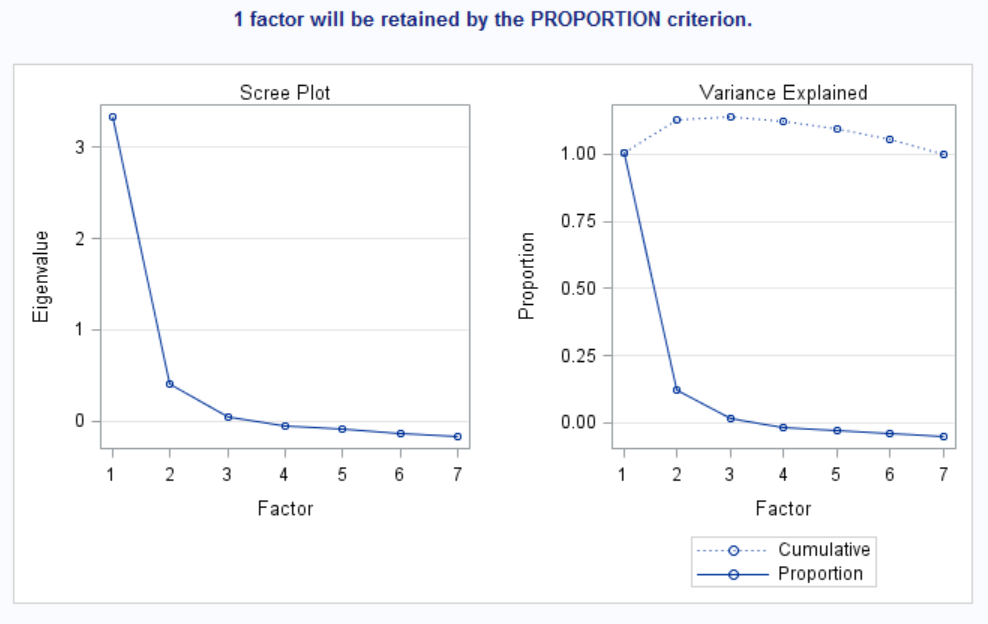

In [40]:
Image(filename = "image/3.PNG")

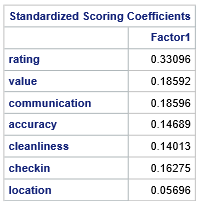

In [41]:
Image(filename = "image/4.PNG")

The ratings in different aspects show an overlap with each other. As is shown in the factor scree plot, the first factor explains a majority of the rating information. Thus, we use the standardized scoring coefficients to deduce the score for the first factor as an overall rating variable in our regression model.

## Prediction example: predict the listed price.

In [116]:
# Prediction examples
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

df = shuffle(df)

In [138]:
# OLS regression model:
model_data = df[["price","accommodates","bathrooms","bedrooms","beds","amenities_length","tv_internet","host_response_rate"]]
length = len(model_data)
sep = int(length*0.8)
train = model_data.iloc[:sep]
Y_train = train["price"].as_matrix()
X_train = train[["accommodates","bathrooms","bedrooms","beds","amenities_length","tv_internet"]].as_matrix()
test = model_data.iloc[sep:]
Y_test = test["price"].as_matrix()
X_test = test[["accommodates","bathrooms","bedrooms","beds","amenities_length","tv_internet"]].as_matrix()

# Train the model using the training sets
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))

print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 4098.14
Variance score: 0.57


we use "accommodates","bathrooms","bedrooms","beds","amenities_length","tv_internet" to predict how much a host can sell his or her house. And our model do have some preicting power with variance score 0.58.

In [137]:
# regression model 2:
model_data = df[["price","bathrooms","bedrooms","beds"]]
length = len(model_data)
sep = int(length*0.8)
train = model_data.iloc[:sep]
Y_train = train["price"].as_matrix()
X_train = train[["bathrooms","bedrooms","beds"]].as_matrix()
test = model_data.iloc[sep:]
Y_test = test["price"].as_matrix()
X_test = test[["bathrooms","bedrooms","beds"]].as_matrix()

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
# Make predictions using the testing set
Y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))

print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 4304.43
Variance score: 0.55


COMMENT: instead of using six variables in the previous, in this case we only use "bathrooms","bedrooms","beds" as predictors and get a better model with variance socre of 0.54.

In [135]:
# K-NN method 
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))

print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Mean squared error: 5089.71
Variance score: 0.46


COMMENT: we know that most of the hosts in Airbnb with considering the similar houses around he or she, and then settle a similar price for the house. Thus we use KNN mothod to similuate, but get a model with variance score only 0.43. 

## Conclusion:

It's the million dollar question°≠ How much money is your place worth as a short-term rental on Airbnb?

How to settle the price for the house is a unavoid question to the host in Airbnb. Airbnb is also trying to design a more reasonable
pricing strategy for its host as well as considering the guest side. When pricing a house, there are many aspects needs to take into
consideration. And what's more, as revealed in our report, no single factor has a determinant power in the pricing. Different aspects
work together. The place where it locates, the condition and infrastucture of the house, and the descrition of the house given by host
can also have an impact on the pricing. A more positive host can leave a better impression on the guest, image management is also a 
deal the host should take into account if he or she want to rent the house at a satisfying price.

In a word, it's never an easy thing to pricing your house in Airbnb, but there indeed exists something you can do to make your house 
worth more.